In [83]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


In [84]:
weight=0.7
bias=0.3

start=0
end=1
step=0.02
X=torch.arange(start, end, step).unsqueeze(1)

In [85]:
X.shape

torch.Size([50, 1])

In [86]:
y=X*weight + bias

In [87]:
y

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260],
        [0.4400],
        [0.4540],
        [0.4680],
        [0.4820],
        [0.4960],
        [0.5100],
        [0.5240],
        [0.5380],
        [0.5520],
        [0.5660],
        [0.5800],
        [0.5940],
        [0.6080],
        [0.6220],
        [0.6360],
        [0.6500],
        [0.6640],
        [0.6780],
        [0.6920],
        [0.7060],
        [0.7200],
        [0.7340],
        [0.7480],
        [0.7620],
        [0.7760],
        [0.7900],
        [0.8040],
        [0.8180],
        [0.8320],
        [0.8460],
        [0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [88]:
from sklearn.model_selection import train_test_split

# Assuming you have your data stored in X (features) and y (labels)
# X and y should be numpy arrays or pandas DataFrames/Series
# Adjust the test_size and random_state according to your needs

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you can use X_train, X_test, y_train, and y_test for training and testing your model


In [89]:
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [90]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([40, 1]),
 torch.Size([10, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 1]))

In [91]:
def plot_predictions(train_data=X_train, train_lables=y_train, test_data=X_test, test_labels= y_test, predictions=None):
    plt.scatter(train_data, train_lables, c="b", s=4, label="Training_data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Test_data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    plt.legend(prop={"size":14})


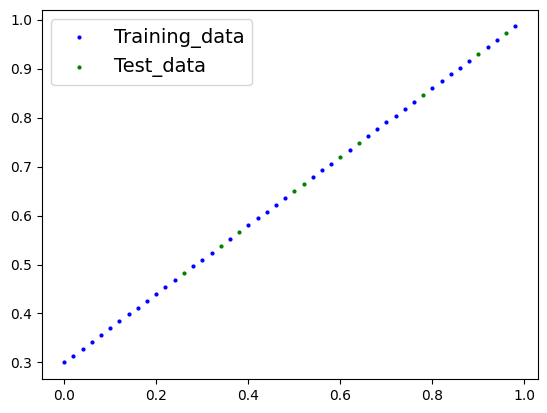

In [92]:
plot_predictions()

In [93]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    def forward(self, x:torch.Tensor) -> torch.Tensor:
            return x*self.weights+ self.bias


In [94]:
model_0=LinearRegressionModel()

In [95]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.2345], requires_grad=True),
 Parameter containing:
 tensor([0.2303], requires_grad=True)]

In [96]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.2345])), ('bias', tensor([0.2303]))])

In [97]:
with torch.inference_mode():
    y_pred=model_0(X_test)
print(y_pred)

tensor([[0.2913],
        [0.4132],
        [0.3710],
        [0.4413],
        [0.3101],
        [0.4554],
        [0.3523],
        [0.3476],
        [0.3804],
        [0.3194]])


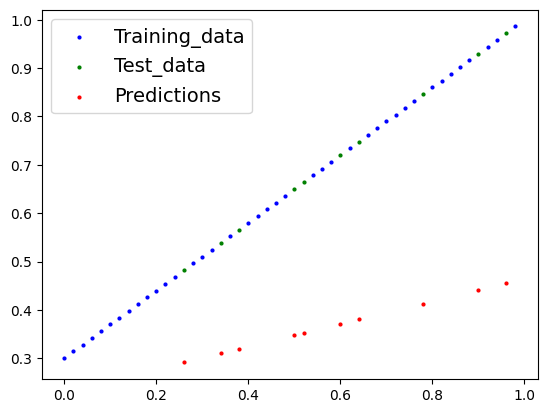

In [98]:
plot_predictions(predictions=y_pred)

In [99]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.2345], requires_grad=True),
 Parameter containing:
 tensor([0.2303], requires_grad=True)]

In [100]:
loss_fn=nn.L1Loss()
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.01, momentum=0.9)

In [101]:
epoch_count=[]
train_loss_l=[]
test_loss_l=[]
epoch=100
for i in range(epoch):
    model_0.train() # to get all the require parameter for the require grads
    y_pred=model_0(X_train)  # it will call the forword function that is present inside the LinearRegression class
    l=loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    l.backward()

    optimizer.step()
    epoch_count.append(i)
    train_loss_l.append(l)

    model_0.eval()
    with torch.inference_mode():
        y_test_pred=model_0(X_test)
        test_loss=loss_fn(y_test_pred, y_test)
        test_loss_l.append(test_loss)

    if i%10==0:
        print(f"Epoch:{i} | Loss: {l} | Test_Loss: {test_loss}")

Epoch:0 | Loss: 0.2863747477531433 | Test_Loss: 0.3306659460067749
Epoch:10 | Loss: 0.11194662749767303 | Test_Loss: 0.09779345989227295
Epoch:20 | Loss: 0.07677311450242996 | Test_Loss: 0.09280350059270859
Epoch:30 | Loss: 0.04248202592134476 | Test_Loss: 0.03284553438425064
Epoch:40 | Loss: 0.010739482007920742 | Test_Loss: 0.003909650258719921
Epoch:50 | Loss: 0.006428520195186138 | Test_Loss: 0.0067178369499742985
Epoch:60 | Loss: 0.001999682281166315 | Test_Loss: 0.005262112710624933
Epoch:70 | Loss: 0.0003775283694267273 | Test_Loss: 0.0017582416767254472
Epoch:80 | Loss: 0.0051939720287919044 | Test_Loss: 0.007170570082962513
Epoch:90 | Loss: 0.005296128336340189 | Test_Loss: 0.008954268880188465


In [102]:
with torch.inference_mode():
    y_pred_new=model_0(X_test)

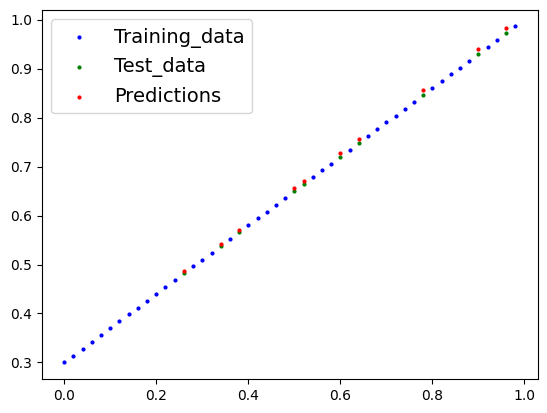

In [103]:
plot_predictions(predictions=y_pred_new)

In [104]:
detached_tensor_list = [tensor.detach() for tensor in train_loss_l]

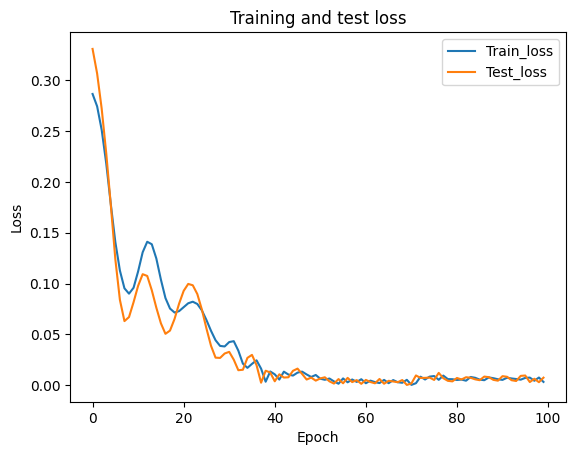

In [105]:
plt.plot(epoch_count, detached_tensor_list, label="Train_loss")
plt.plot(epoch_count, test_loss_l, label="Test_loss")
plt.title("Training and test loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()

In [106]:
device="cuda" if torch.cuda.is_available() else "cpu"
print(f"using device: {device}")

using device: cpu


In [107]:
#Model v2
class Linearmodelv2(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1=nn.Linear(in_features=1, out_features=1, device=device)
    def forward(self, x:torch.Tensor)-> torch.Tensor:
        return self.l1(x)


In [108]:
torch.manual_seed(42)
model1=Linearmodelv2()

In [109]:
model1.state_dict()

OrderedDict([('l1.weight', tensor([[0.7645]])), ('l1.bias', tensor([0.8300]))])

In [110]:
model1.state_dict()

OrderedDict([('l1.weight', tensor([[0.7645]])), ('l1.bias', tensor([0.8300]))])

In [111]:
next(model1.parameters()).device

device(type='cpu')

In [112]:
from torch import optim
loss=torch.nn.L1Loss()

optimizer = optim.SGD(model1.parameters(), lr=0.01, momentum=0.9)

In [113]:
#Make our data to the device agnostic
X_train=X_train.to(device)
X_test=X_test.to(device)
y_train=y_train.to(device)
y_test=y_test.to(device)
#make the model too the device agnostic
model1=model1.to(device)

In [114]:
epoch_count=[]
train_loss_count=[]
test_loss_count=[]
epochs=100
for epoch in range(epochs):
    model1.train() # Setting in the traing mode
    y_pred=model1(X_train) # It will call the forward function
    l=loss(y_pred, y_train)
    optimizer.zero_grad()
    l.backward()
    optimizer.step()
    model1.eval()
    epoch_count.append(epoch)
    train_loss_count.append(l)

    with torch.inference_mode():
        y_p_test=model1(X_test)
        l_t=loss(y_p_test, y_test)
        test_loss_count.append(l_t)
    if epoch%10==0:
        print(f"epoch: {epoch} | Train_Loss: {l} | Test_Loss: {l_t}")

epoch: 0 | Train_Loss: 0.5600506067276001 | Test_Loss: 0.5552194714546204
epoch: 10 | Train_Loss: 0.05733057111501694 | Test_Loss: 0.04575348272919655
epoch: 20 | Train_Loss: 0.09788976609706879 | Test_Loss: 0.0687037780880928
epoch: 30 | Train_Loss: 0.027207940816879272 | Test_Loss: 0.04520300030708313
epoch: 40 | Train_Loss: 0.03954756632447243 | Test_Loss: 0.019374191761016846
epoch: 50 | Train_Loss: 0.005108425859361887 | Test_Loss: 0.022245701402425766
epoch: 60 | Train_Loss: 0.015561523847281933 | Test_Loss: 0.0038316785357892513
epoch: 70 | Train_Loss: 0.009455020539462566 | Test_Loss: 0.009560326114296913
epoch: 80 | Train_Loss: 0.011349978856742382 | Test_Loss: 0.017295777797698975
epoch: 90 | Train_Loss: 0.015662094578146935 | Test_Loss: 0.008295184001326561


In [115]:
detached_tensor_list = [tensor.detach() for tensor in train_loss_count]


In [116]:
detached_tensor_list = [tensor.cpu() for tensor in detached_tensor_list]

In [117]:
detached_tensor_list_test = [tensor.cpu() for tensor in test_loss_count]

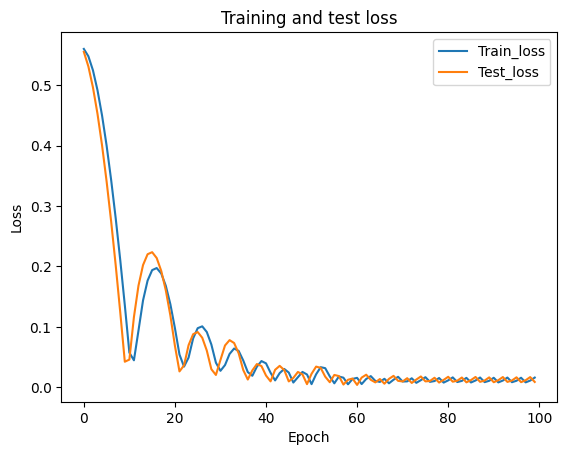

In [118]:
plt.plot(epoch_count, detached_tensor_list, label="Train_loss")
plt.plot(epoch_count, detached_tensor_list_test, label="Test_loss")
plt.title("Training and test loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()

In [119]:
model1.state_dict()

OrderedDict([('l1.weight', tensor([[0.7035]])), ('l1.bias', tensor([0.3067]))])

### Saving and Loading the model

In [120]:
from pathlib import Path
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME="Model1.pth"
MODEL_SAVE_PATH= MODEL_PATH / MODEL_NAME
print(f"Saving model to:{MODEL_SAVE_PATH}")

torch.save(obj= model1.state_dict() , f=MODEL_SAVE_PATH)

Saving model to:models/Model1.pth


In [121]:
#Load the model

In [122]:
#Create instance of the model
Loaded_model_1=Linearmodelv2()
Loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [123]:
next(Loaded_model_1.parameters()).device

device(type='cpu')

In [124]:
Loaded_model_1.to(device)

Linearmodelv2(
  (l1): Linear(in_features=1, out_features=1, bias=True)
)

In [126]:
Loaded_model_1.state_dict()

OrderedDict([('l1.weight', tensor([[0.7035]])), ('l1.bias', tensor([0.3067]))])

In [128]:
Loaded_model_1.eval()
with torch.inference_mode():
    y_loaded_pred=Loaded_model_1(X_test)
y_p_test==y_loaded_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])